In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from src.EXPM import EXPM
from src.CascadeBandit import CascadeBandit
from src.UCB import UCBM
from env.bandit_env import MAB_Bernoulli
from env.movielens_env import Movielens
from src.bandit_utils import play_all

In [2]:
from env.adv_env import Bernoulli_adv_dependent
from src.UCB import UCBM
from src.comband import CombBand, _dumb_sampling

rng = np.random.default_rng(seed = 42)
T = 10_000
N = 10
K = 20

p_opt = 0.3
p_subopt = 0.1

res_list = []

for M in tqdm([2,3,4,5,6,7,8,9,10]):
    env = MAB_Bernoulli(K, M, seed = M)
    expm = EXPM(K, M)
    casc = CascadeBandit(K, M, method='UCB')
    casc_kl = CascadeBandit(K, M, method='KL-UCB')
    cb = CombBand(K,M,sampling_function=_dumb_sampling)
    #
    res = play_all(env, [cb, casc, casc_kl, expm], T, N, disable_tqdm_T = True)
    res_list += [res]

  0%|          | 0/9 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

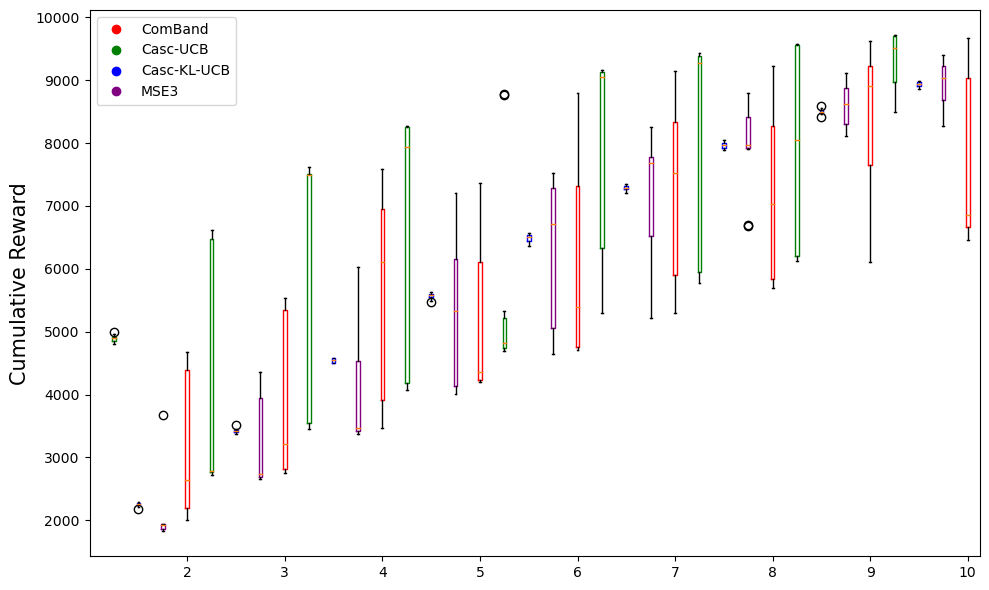

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
tot = []

colors = ['red', 'green', 'blue', 'purple']

for en,i in enumerate(res_list):
    for en2, (label, res_dict) in enumerate(i,1):
        ind = (en * 4) + en2
        data = np.cumsum(res_dict, axis=1)[:, -1]
        tot += [data]

        # Set color for the current subplot
        color = colors[ind % len(colors)]

        # Plot boxplot with specified color
        ax.boxplot([data], positions=[ind], boxprops=dict(color=color))

ax.set_ylabel("Cumulative Reward", fontsize=15)
ax.set_xticks(np.arange(len(tot)))
#labels = [a for a,_ in res] * 10
labels = [ [i,i,i,i] for i in range(2,11)]
labels = np.array([item for sublist in labels for item in sublist])

plt.xticks(
    np.arange(4, len(labels)+4, 4), 
    np.arange(2,11)
)

legend_labels = [i for i,_ in res_list[0]]
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='None') for label, color in zip(legend_labels, colors)]
ax.legend(handles=custom_legend)

fig.tight_layout()
fig.savefig('./results/varying/bern_vary.pdf')